What is a Stock market?

The stock market is a market that enables the seamless exchange of buying and selling of company stocks. 
Every Stock Exchange has its own Stock Index value. The index is the average value that is calculated by combining several stocks. 
This helps in representing the entire stock market and predicting the market’s movement over time. 
The stock market can have a huge impact on people and the country’s economy as a whole. 
Therefore, predicting the stock trends in an efficient manner can minimize the risk of loss and maximize profit.

## SECTION-1

In [244]:
import pandas as pd

In [245]:
df=pd.read_csv('C:\\Users\\USER\\Downloads\\MARUTI.csv')

In [246]:
df.head()

Date  Symbol Series  Prev Close    Open    High     Low   Last  \
0  2003-07-09  MARUTI     EQ      125.00  164.90  170.40  155.00  164.0   
1  2003-07-10  MARUTI     EQ      164.30  167.00  168.70  164.50  167.0   
2  2003-07-11  MARUTI     EQ      167.00  167.75  174.85  166.25  173.6   
3  2003-07-14  MARUTI     EQ      173.35  174.25  179.25  174.25  178.6   
4  2003-07-15  MARUTI     EQ      177.95  200.00  200.00  173.00  176.3   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  164.30  165.95  35164283  5.835528e+14     NaN           8537695.0   
1  167.00  166.74  10464179  1.744820e+14     NaN           4363947.0   
2  173.35  172.45  11740117  2.024622e+14     NaN           3014852.0   
3  177.95  177.91   5982324  1.064313e+14     NaN           1949217.0   
4  176.20  176.88   6173689  1.092001e+14     NaN           1307694.0   

   %Deliverble  
0       0.2428  
1       0.4170  
2       0.2568  
3       0.3258  
4       0.2118

In [247]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [248]:
missing_table=missing_values_table(df)
missing_table

Your selected dataframe has 15 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
Trades                        1971               45.8
Deliverable Volume               1                0.0
%Deliverble                      1                0.0

In [249]:
import missingno as msno

<AxesSubplot:>

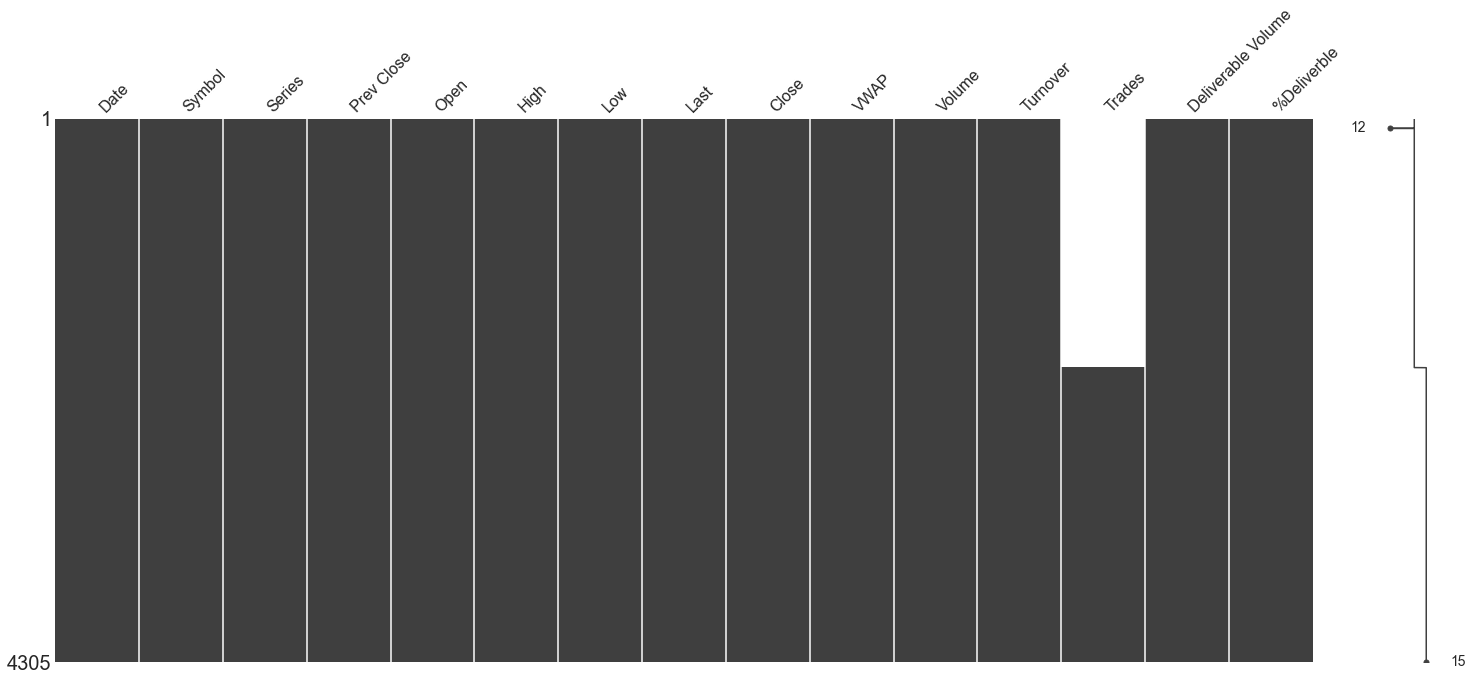

In [250]:
msno.matrix(df)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4305 non-null   object 
 1   Symbol              4305 non-null   object 
 2   Series              4305 non-null   object 
 3   Prev Close          4305 non-null   float64
 4   Open                4305 non-null   float64
 5   High                4305 non-null   float64
 6   Low                 4305 non-null   float64
 7   Last                4305 non-null   float64
 8   Close               4305 non-null   float64
 9   VWAP                4305 non-null   float64
 10  Volume              4305 non-null   int64  
 11  Turnover            4305 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4304 non-null   float64
 14  %Deliverble         4304 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 504.6

In [252]:
df=df[['Date','Open','High','Low','Close','Volume','VWAP']]

It appears that the Date column is being treated as a string rather than as dates. 
To fix this, we’ll use the pandas to_datetime() feature which converts the arguments to dates.

In [253]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df

Date     Open     High      Low    Close    Volume     VWAP
0    2003-07-09   164.90   170.40   155.00   164.30  35164283   165.95
1    2003-07-10   167.00   168.70   164.50   167.00  10464179   166.74
2    2003-07-11   167.75   174.85   166.25   173.35  11740117   172.45
3    2003-07-14   174.25   179.25   174.25   177.95   5982324   177.91
4    2003-07-15   200.00   200.00   173.00   176.20   6173689   176.88
...         ...      ...      ...      ...      ...       ...      ...
4300 2020-10-26  7100.00  7161.30  6935.05  7054.80   1559361  7056.34
4301 2020-10-27  7067.00  7209.75  7053.00  7158.40   1461819  7139.86
4302 2020-10-28  7194.95  7332.00  7110.00  7186.05   1645177  7240.73
4303 2020-10-29  7114.00  7199.00  6986.70  7117.70   1434853  7092.42
4304 2020-10-30  7079.05  7110.00  6881.00  6965.15   1360249  6979.63

[4305 rows x 7 columns]

In [254]:
# Sort values by timestamp (not necessary in this case)
df_date = df.sort_values(by='Date')

# Check time intervals
df_date['Time_Interval'] = df_date.Date - df_date.Date.shift(1)

df_date[['Date', 'Time_Interval']].head()

Date Time_Interval
0 2003-07-09           NaT
1 2003-07-10        1 days
2 2003-07-11        1 days
3 2003-07-14        3 days
4 2003-07-15        1 days

In [255]:
df_date['Time_Interval'].value_counts()

1 days    3281
3 days     791
2 days     135
4 days      87
5 days       9
6 days       1
Name: Time_Interval, dtype: int64

In [256]:
df["Month"] = df.Date.dt.month
df["Week"] = df.Date.dt.week
df["Day"] = df.Date.dt.day
df["Day of week"] = df.Date.dt.dayofweek

In [257]:
df

Date     Open     High      Low    Close    Volume     VWAP  Month  \
0    2003-07-09   164.90   170.40   155.00   164.30  35164283   165.95      7   
1    2003-07-10   167.00   168.70   164.50   167.00  10464179   166.74      7   
2    2003-07-11   167.75   174.85   166.25   173.35  11740117   172.45      7   
3    2003-07-14   174.25   179.25   174.25   177.95   5982324   177.91      7   
4    2003-07-15   200.00   200.00   173.00   176.20   6173689   176.88      7   
...         ...      ...      ...      ...      ...       ...      ...    ...   
4300 2020-10-26  7100.00  7161.30  6935.05  7054.80   1559361  7056.34     10   
4301 2020-10-27  7067.00  7209.75  7053.00  7158.40   1461819  7139.86     10   
4302 2020-10-28  7194.95  7332.00  7110.00  7186.05   1645177  7240.73     10   
4303 2020-10-29  7114.00  7199.00  6986.70  7117.70   1434853  7092.42     10   
4304 2020-10-30  7079.05  7110.00  6881.00  6965.15   1360249  6979.63     10   

      Week  Day  Day of week  
0       28    9            2  
1       28   10            3  
2       28   11            4  
3       29   14            0  
4       29   15            1  
...    ...  ...          ...  
4300    44   26            0  
4301    44   27            1  
4302    44   28            2  
4303    44   29            3  
4304    44   30            4  

[4305 rows x 11 columns]

In [258]:
df=df.iloc[:,:-4]

In [259]:
df.set_index('Date',inplace=True)
df.head()

Open    High     Low   Close    Volume    VWAP
Date                                                        
2003-07-09  164.90  170.40  155.00  164.30  35164283  165.95
2003-07-10  167.00  168.70  164.50  167.00  10464179  166.74
2003-07-11  167.75  174.85  166.25  173.35  11740117  172.45
2003-07-14  174.25  179.25  174.25  177.95   5982324  177.91
2003-07-15  200.00  200.00  173.00  176.20   6173689  176.88

In [260]:
df

Open     High      Low    Close    Volume     VWAP
Date                                                             
2003-07-09   164.90   170.40   155.00   164.30  35164283   165.95
2003-07-10   167.00   168.70   164.50   167.00  10464179   166.74
2003-07-11   167.75   174.85   166.25   173.35  11740117   172.45
2003-07-14   174.25   179.25   174.25   177.95   5982324   177.91
2003-07-15   200.00   200.00   173.00   176.20   6173689   176.88
...             ...      ...      ...      ...       ...      ...
2020-10-26  7100.00  7161.30  6935.05  7054.80   1559361  7056.34
2020-10-27  7067.00  7209.75  7053.00  7158.40   1461819  7139.86
2020-10-28  7194.95  7332.00  7110.00  7186.05   1645177  7240.73
2020-10-29  7114.00  7199.00  6986.70  7117.70   1434853  7092.42
2020-10-30  7079.05  7110.00  6881.00  6965.15   1360249  6979.63

[4305 rows x 6 columns]

In [261]:
df.describe()

Open         High          Low        Close        Volume  \
count  4305.000000  4305.000000  4305.000000  4305.000000  4.305000e+03   
mean   2803.934472  2837.747433  2767.077549  2801.740918  1.197402e+06   
std    2681.161552  2704.761111  2652.623803  2677.195355  1.658447e+06   
min     164.000000   168.700000   155.000000   164.300000  2.279600e+04   
25%     815.000000   829.950000   796.250000   812.450000  4.216340e+05   
50%    1391.550000  1412.000000  1370.250000  1390.800000  6.831620e+05   
75%    4600.000000  4645.950000  4557.250000  4606.900000  1.204104e+06   
max    9966.000000  9996.400000  9725.000000  9832.450000  3.516428e+07   

             VWAP  
count  4305.00000  
mean   2802.90236  
std    2678.71221  
min     165.06000  
25%     813.51000  
50%    1391.64000  
75%    4602.97000  
max    9850.96000

Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

The Open and Close columns indicate the opening and closing price of the stocks on a particular day.

The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.

The Volume column tells us the total volume of stocks traded on a particular day.

The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price.

### Stock Price Movement of Maruti

In [262]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

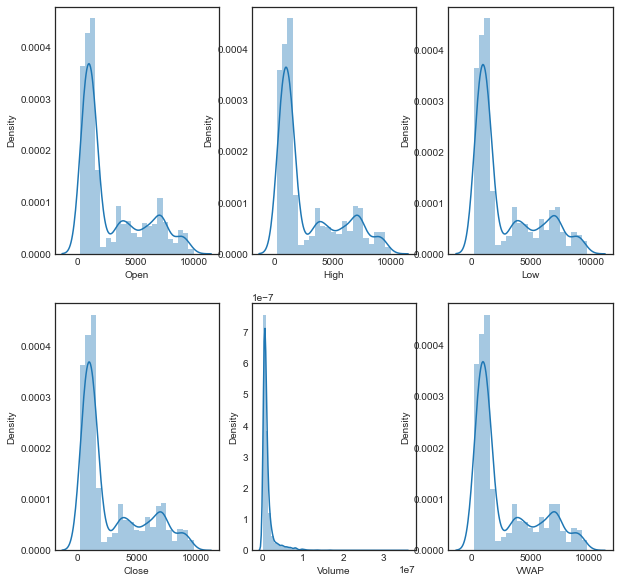

In [264]:
#Size and style of the plot
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Subplots of distplot
plt.subplot(231)
sns.distplot(df['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df['Volume'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df['VWAP'])
fig = plt.gcf()
fig.set_size_inches(10,10)

Insights:

All the meaures exhibit equal distribution property

All the distributions are right skewed

In [265]:
df['VWAP'].asfreq('MS').interpolate()

Date
2003-08-01     184.360
2003-09-01     234.780
2003-10-01     229.600
2003-11-01     292.105
2003-12-01     354.610
                ...   
2020-06-01    5790.130
2020-07-01    5815.430
2020-08-01    6372.635
2020-09-01    6929.840
2020-10-01    6842.010
Freq: MS, Name: VWAP, Length: 207, dtype: float64

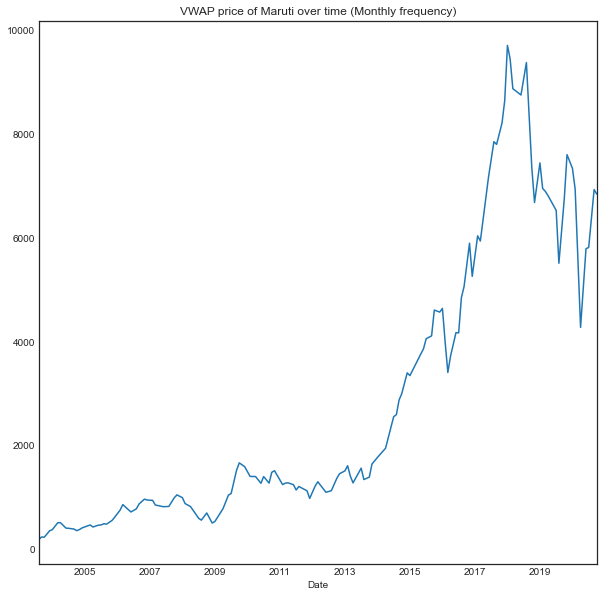

In [266]:
df['VWAP'].asfreq('MS').interpolate().plot() # asfreq method is used to convert a time series to a specified frequency. 
                                                 # Here it is monthly frequency. Also using interpolate() to fix the gaps between the timeseries
plt.title('VWAP price of Maruti over time (Monthly frequency)')
plt.show()

In [267]:

import plotly.express as px
import plotly.graph_objs as go

In [268]:
fig = px.line(df, x=df.index, y='VWAP',title='VWAP over Years(Use Rangeslider to slide over time)')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Text(0, 0.5, 'VWAP')

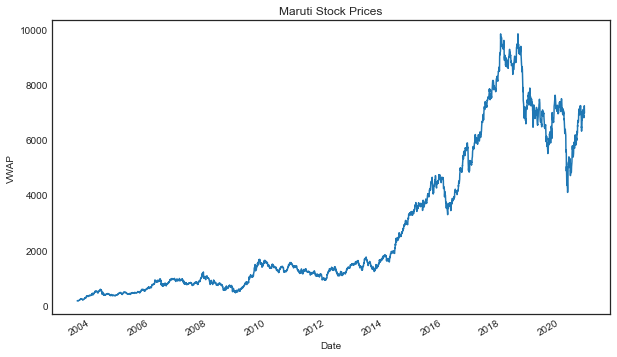

In [269]:
import matplotlib.pyplot as plt
df['VWAP'].plot(figsize=(10,6),title='Maruti Stock Prices')
plt.ylabel('VWAP')

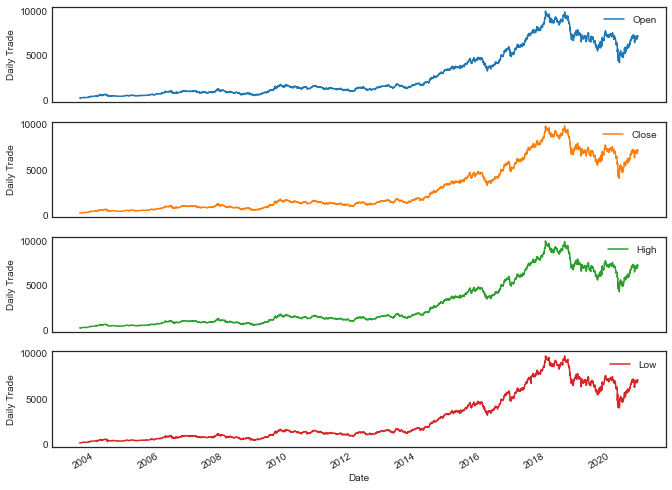

In [270]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trade')

Volume Over Time

In [271]:
import plotly.express as px
import plotly.graph_objects as go

In [272]:
fig = go.Figure([go.Scatter(x=df.index, y=df['Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

In [273]:
fig = go.Figure([go.Scatter(x=df.loc['2018', 'Volume'].index,y=df.loc['2018', 'Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume in 2018'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

In [274]:
fig = go.Figure([go.Scatter(x=df.loc['2020', 'Volume'].index,y=df.loc['2020', 'Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume in 2020'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

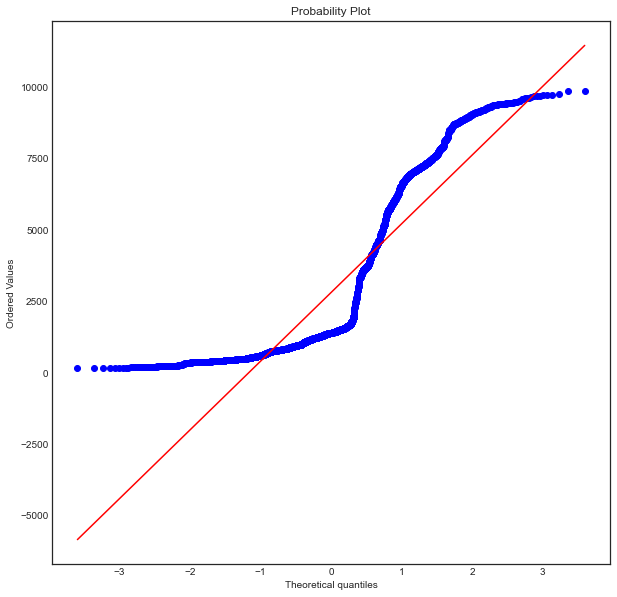

In [275]:
import scipy.stats
import pylab
scipy.stats.probplot(df.VWAP,plot=pylab)
pylab.show()


### BIVARIATE ANALYSIS

In [276]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df.index,
         y=df['Open'],
         name='Open',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df.index,
         y=df['Close'],
         name='Close',
    line=dict(color='red'),opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
                ])
    )
)
        
    
fig.update_layout(title_text='Open Vs Close',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

In [277]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df.index,
         y=df['High'],
         name='High',
    line = dict(color='green', width=4, dash='dot'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df.index,
         y=df['Low'],
         name='Low',
    line=dict(color='orange', width=4, dash='dot'),
    opacity=0.8)) 

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
                ])
    )
)
    
fig.update_layout(title_text='High Vs Low',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='month', ylabel='VWAP'>

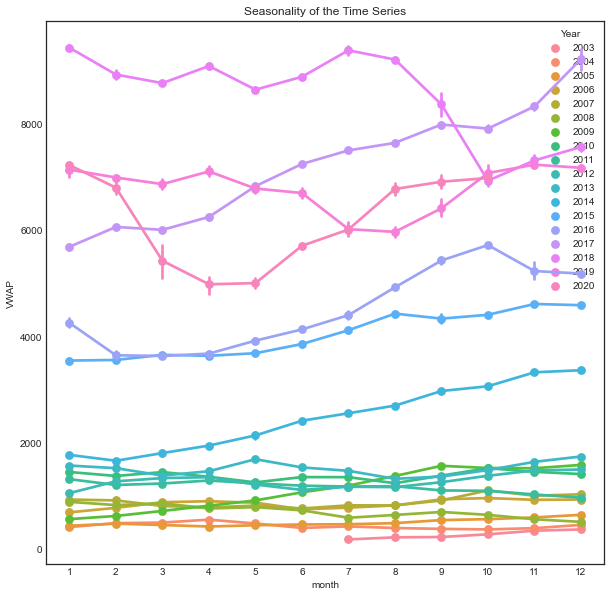

In [278]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='month',y='VWAP',hue='Year',data=df_temp)

## Subsetting Data Using Pandas Dataframes



Instead of working with the entire data, it is also possible to slice the Time Series data to highlight the portion of the data we are interested in. 
Since the volume weighted average price (VWAP) is a trading benchmark, we shall limit our analysis to only that column.

In [279]:
df_vwap=df[['VWAP']]

In [280]:
df_vwap['2017':'2020']

VWAP
Date               
2017-01-02  5386.21
2017-01-03  5485.36
2017-01-04  5521.15
2017-01-05  5600.23
2017-01-06  5616.11
...             ...
2020-10-26  7056.34
2020-10-27  7139.86
2020-10-28  7240.73
2020-10-29  7092.42
2020-10-30  6979.63

[949 rows x 1 columns]

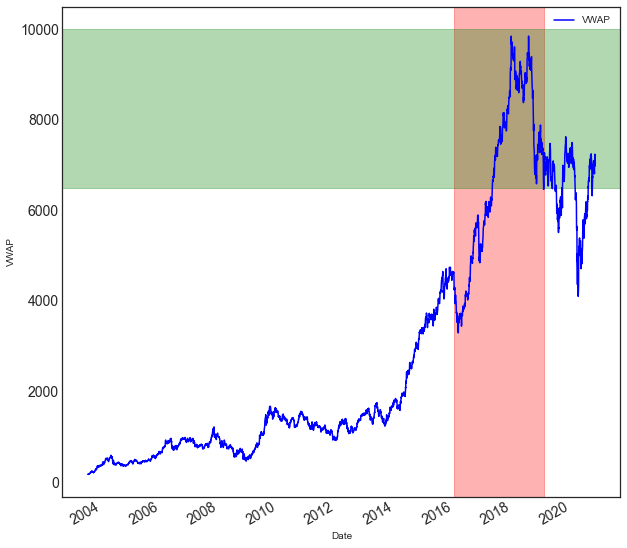

In [281]:
ax = df_vwap.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2016-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,10000, color='green',alpha=0.3)

plt.show()

<AxesSubplot:xlabel='VWAP', ylabel='Density'>

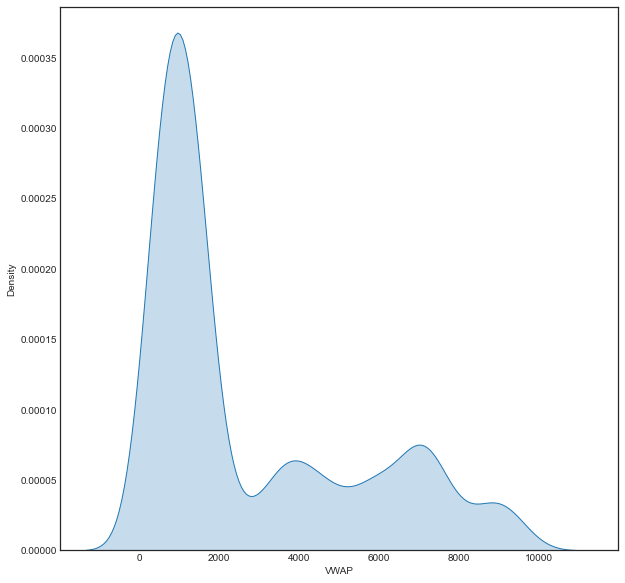

In [282]:
import seaborn as sns
sns.kdeplot(df_vwap['VWAP'],shade=True)

<AxesSubplot:title={'center':' volume weighted average price'}, xlabel='Date'>

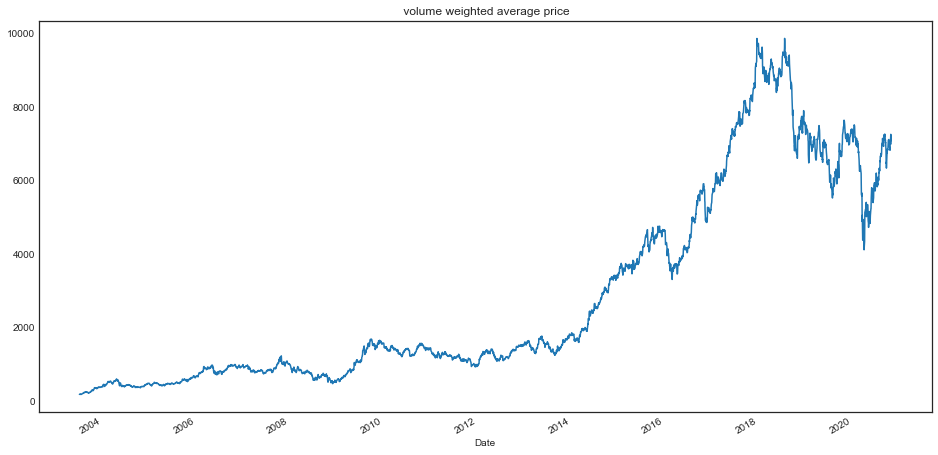

In [283]:
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

It appears that Maruti had a more or less steady increase in its stock price over the from 2004 to the mid of 2018 window.There appears to be some drop in 2019 though.let's further analyse the data for the year 2018.

In [284]:
df_vwap['2017':]

VWAP
Date               
2017-01-02  5386.21
2017-01-03  5485.36
2017-01-04  5521.15
2017-01-05  5600.23
2017-01-06  5616.11
...             ...
2020-10-26  7056.34
2020-10-27  7139.86
2020-10-28  7240.73
2020-10-29  7092.42
2020-10-30  6979.63

[949 rows x 1 columns]

<AxesSubplot:title={'center':' volume weighted average price'}, xlabel='Date'>

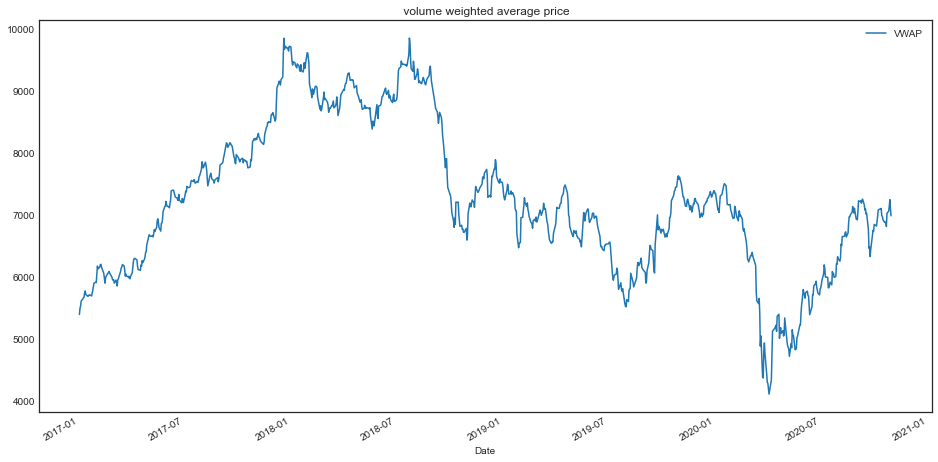

In [285]:
df_vwap['2017':].plot(figsize=(16,8),title=' volume weighted average price')

Increase in 2017 and stabilised in the beg of 2018 upto late 2018 and fell then and is constant in 5000-7000 from then

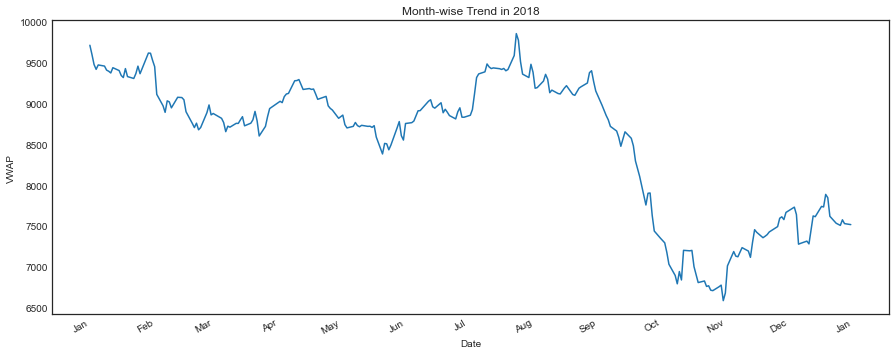

In [286]:
import matplotlib.dates as mdates
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

We see that there was a dip in the stock prices particularly around end of October and November. Let's zoom in on these dates

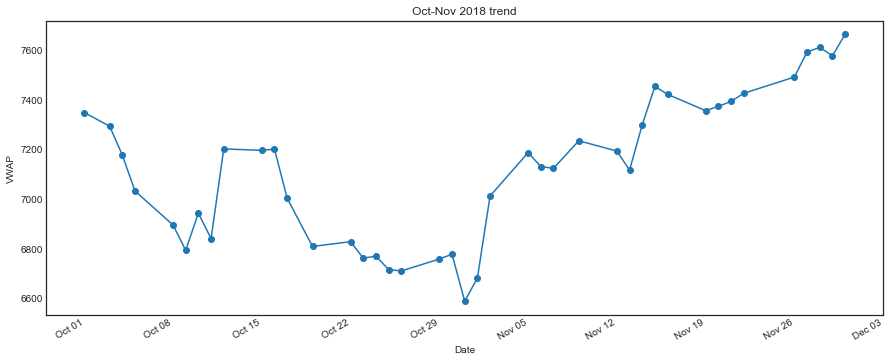

In [287]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

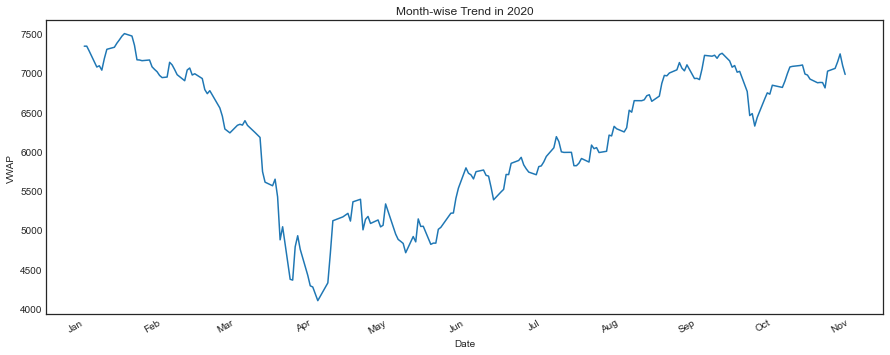

In [288]:
import matplotlib.dates as mdates
ax = df_vwap.loc['2020', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2020'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

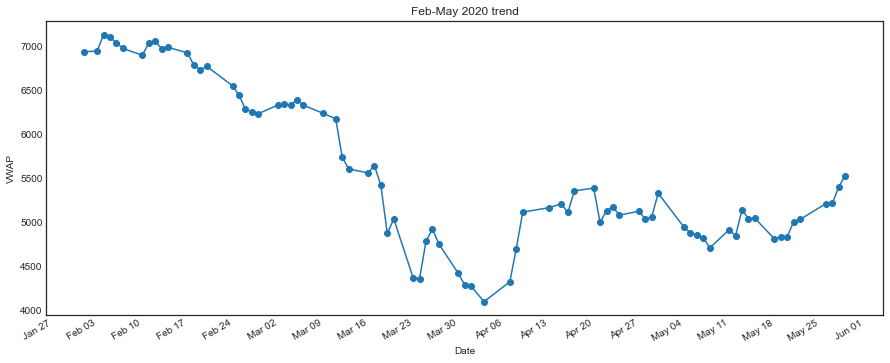

In [289]:
ax = df_vwap.loc['2020-02':'2020-05','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Feb-May 2020 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [290]:
from plotly.offline import init_notebook_mode, iplot
# Candlestick chart of 2008
trace = go.Candlestick(x=df['2020'].index,
                open=df['2020'].Open,
                high=df['2020'].High,
                low=df['2020'].Low,
                close=df['2020'].Close)
data = [trace]
print('OHLC price chart (Candlestick) of Maruti for 2020')
iplot(data, filename='simple_candlestick')

OHLC price chart (Candlestick) of Maruti for 2020


In [291]:
df_vwap

VWAP
Date               
2003-07-09   165.95
2003-07-10   166.74
2003-07-11   172.45
2003-07-14   177.91
2003-07-15   176.88
...             ...
2020-10-26  7056.34
2020-10-27  7139.86
2020-10-28  7240.73
2020-10-29  7092.42
2020-10-30  6979.63

[4305 rows x 1 columns]

In [292]:
ma_day = [10, 20, 50]

for ma in ma_day:
    
    column_name = f"MA for {ma} days"
    df_vwap[column_name] = df_vwap['VWAP'].rolling(ma).mean()

In [293]:
df_vwap

VWAP  MA for 10 days  MA for 20 days  MA for 50 days
Date                                                               
2003-07-09   165.95             NaN             NaN             NaN
2003-07-10   166.74             NaN             NaN             NaN
2003-07-11   172.45             NaN             NaN             NaN
2003-07-14   177.91             NaN             NaN             NaN
2003-07-15   176.88             NaN             NaN             NaN
...             ...             ...             ...             ...
2020-10-26  7056.34        6948.869       6921.0525       6944.2960
2020-10-27  7139.86        6952.863       6944.5375       6953.0264
2020-10-28  7240.73        6978.469       6969.3220       6960.5016
2020-10-29  7092.42        6990.584       6987.5290       6963.0022
2020-10-30  6979.63        6996.523       6994.4100       6963.3628

[4305 rows x 4 columns]

Text(0.5, 1.0, 'MARUTI STATS')

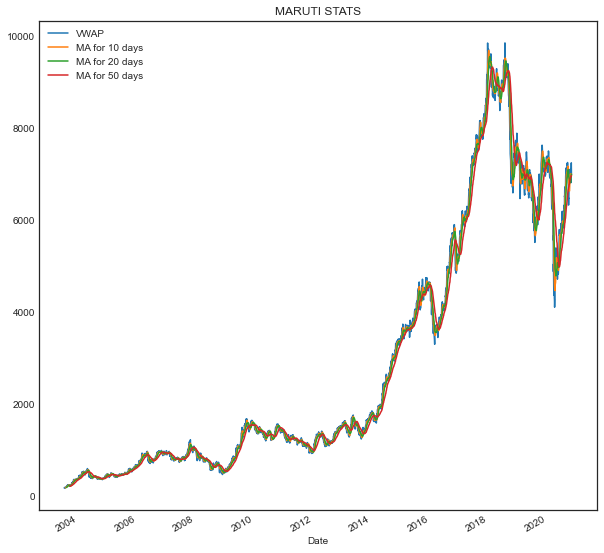

In [294]:
df_vwap[['VWAP', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('MARUTI STATS')

In [295]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df_vwap.index,
         y=df_vwap['VWAP'],
         name='VWAP',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df_vwap.index,
         y=df_vwap['MA for 10 days'],
         name='MA for 10 days',
    line=dict(color='red'),opacity=0.8))

fig.add_trace(go.Scatter(
         x=df_vwap.index,
         y=df_vwap['MA for 20 days'],
         name='MA for 20 days',
    line=dict(color='yellow'),opacity=0.8))

fig.add_trace(go.Scatter(
         x=df_vwap.index,
         y=df_vwap['MA for 50 days'],
         name='MA for 50 days',
    line=dict(color='green'),opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
                ])
    )
)
        
    
fig.update_layout(title_text='MARUTI STATS',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

In [296]:
df_vwap['Daily Return'] = df_vwap['VWAP'].pct_change().mul(100)

In [297]:
df_vwap

VWAP  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                  
2003-07-09   165.95             NaN             NaN             NaN   
2003-07-10   166.74             NaN             NaN             NaN   
2003-07-11   172.45             NaN             NaN             NaN   
2003-07-14   177.91             NaN             NaN             NaN   
2003-07-15   176.88             NaN             NaN             NaN   
...             ...             ...             ...             ...   
2020-10-26  7056.34        6948.869       6921.0525       6944.2960   
2020-10-27  7139.86        6952.863       6944.5375       6953.0264   
2020-10-28  7240.73        6978.469       6969.3220       6960.5016   
2020-10-29  7092.42        6990.584       6987.5290       6963.0022   
2020-10-30  6979.63        6996.523       6994.4100       6963.3628   

            Daily Return  
Date                      
2003-07-09           NaN  
2003-07-10      0.476047  
2003-07-11      3.424493  
2003-07-14      3.166135  
2003-07-15     -0.578944  
...                  ...  
2020-10-26      0.500914  
2020-10-27      1.183616  
2020-10-28      1.412773  
2020-10-29     -2.048274  
2020-10-30     -1.590289  

[4305 rows x 5 columns]

Text(0.5, 1.0, 'Percent Change on VWAP')

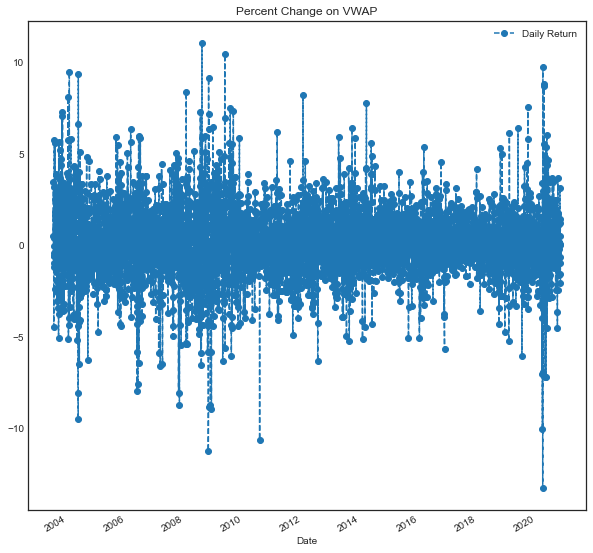

In [298]:
df_vwap['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title('Percent Change on VWAP')

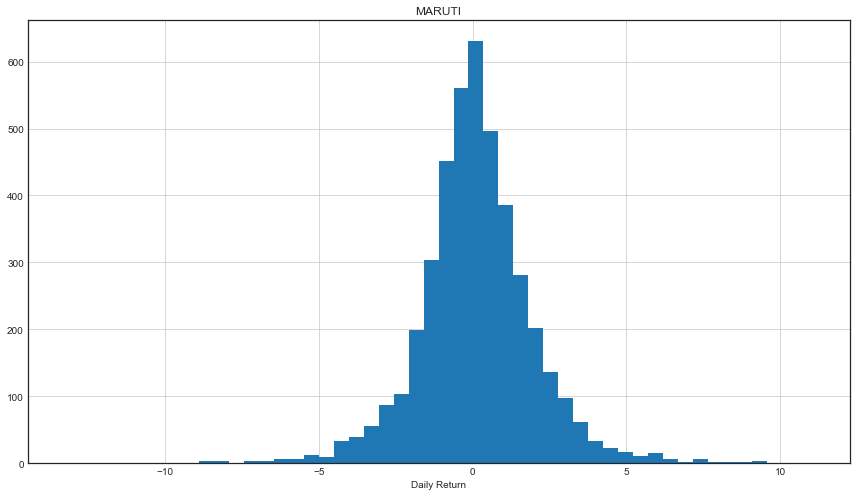

In [299]:
plt.figure(figsize=(12, 7))

df_vwap['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.title('MARUTI')
    
plt.tight_layout()

## SECTION-2

In [300]:
df_vwap.drop(['MA for 10 days','MA for 20 days','MA for 50 days','Daily Return'],axis=1,inplace=True)

In [301]:
df_vwap

VWAP
Date               
2003-07-09   165.95
2003-07-10   166.74
2003-07-11   172.45
2003-07-14   177.91
2003-07-15   176.88
...             ...
2020-10-26  7056.34
2020-10-27  7139.86
2020-10-28  7240.73
2020-10-29  7092.42
2020-10-30  6979.63

[4305 rows x 1 columns]

In [302]:
df

Open     High      Low    Close    Volume     VWAP
Date                                                             
2003-07-09   164.90   170.40   155.00   164.30  35164283   165.95
2003-07-10   167.00   168.70   164.50   167.00  10464179   166.74
2003-07-11   167.75   174.85   166.25   173.35  11740117   172.45
2003-07-14   174.25   179.25   174.25   177.95   5982324   177.91
2003-07-15   200.00   200.00   173.00   176.20   6173689   176.88
...             ...      ...      ...      ...       ...      ...
2020-10-26  7100.00  7161.30  6935.05  7054.80   1559361  7056.34
2020-10-27  7067.00  7209.75  7053.00  7158.40   1461819  7139.86
2020-10-28  7194.95  7332.00  7110.00  7186.05   1645177  7240.73
2020-10-29  7114.00  7199.00  6986.70  7117.70   1434853  7092.42
2020-10-30  7079.05  7110.00  6881.00  6965.15   1360249  6979.63

[4305 rows x 6 columns]

In [303]:
df_tem=df.reset_index()

In [304]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4305 non-null   datetime64[ns]
 1   Open    4305 non-null   float64       
 2   High    4305 non-null   float64       
 3   Low     4305 non-null   float64       
 4   Close   4305 non-null   float64       
 5   Volume  4305 non-null   int64         
 6   VWAP    4305 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 235.6 KB


In [305]:

lag_features = ['Open','High','Low','Close','Volume','VWAP']
window1 = 3
window2 = 7
window3 = 30


In [306]:
import numpy as np

In [307]:
df_rolled_3d = df_tem[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_tem[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df_tem[lag_features].rolling(window=window3, min_periods=0)

In [308]:
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()

In [309]:
df_mean_3d

index         Open         High          Low        Close        Volume  \
0         0          NaN          NaN          NaN          NaN           NaN   
1         1   164.900000   170.400000   155.000000   164.300000  3.516428e+07   
2         2   165.950000   169.550000   159.750000   165.650000  2.281423e+07   
3         3   166.550000   171.316667   161.916667   168.216667  1.912286e+07   
4         4   169.666667   174.266667   168.333333   172.766667  9.395540e+06   
...     ...          ...          ...          ...          ...           ...   
4300   4300  6863.333333  6977.433333  6790.616667  6925.550000  1.085170e+06   
4301   4301  6928.666667  7048.666667  6847.416667  6989.866667  1.300967e+06   
4302   4302  7008.333333  7165.250000  6940.016667  7105.483333  1.593393e+06   
4303   4303  7120.650000  7234.350000  7032.683333  7133.083333  1.555452e+06   
4304   4304  7125.316667  7246.916667  7049.900000  7154.050000  1.513950e+06   

             VWAP  
0             NaN  
1      165.950000  
2      166.345000  
3      168.380000  
4      172.366667  
...           ...  
4300  6901.786667  
4301  6961.840000  
4302  7072.456667  
4303  7145.643333  
4304  7157.670000  

[4305 rows x 7 columns]

In [310]:
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

In [311]:
df_mean_7d

index         Open         High          Low        Close        Volume  \
0         0          NaN          NaN          NaN          NaN           NaN   
1         1   164.900000   170.400000   155.000000   164.300000  3.516428e+07   
2         2   165.950000   169.550000   159.750000   165.650000  2.281423e+07   
3         3   166.550000   171.316667   161.916667   168.216667  1.912286e+07   
4         4   168.475000   173.300000   165.000000   170.650000  1.583773e+07   
...     ...          ...          ...          ...          ...           ...   
4300   4300  6900.857143  6984.457143  6818.221429  6894.385714  8.290116e+05   
4301   4301  6911.000000  7000.371429  6829.271429  6917.557143  9.544459e+05   
4302   4302  6935.571429  7033.192857  6856.414286  6955.200000  1.069289e+06   
4303   4303  6966.992857  7083.478571  6897.128571  7002.928571  1.225962e+06   
4304   4304  7009.421429  7119.192857  6922.371429  7041.942857  1.336674e+06   

             VWAP  
0             NaN  
1      165.950000  
2      166.345000  
3      168.380000  
4      170.762500  
...           ...  
4300  6906.822857  
4301  6918.975714  
4302  6950.350000  
4303  7002.804286  
4304  7033.530000  

[4305 rows x 7 columns]

In [312]:
df_mean_30d

index         Open         High          Low        Close        Volume  \
0         0          NaN          NaN          NaN          NaN           NaN   
1         1   164.900000   170.400000   155.000000   164.300000  3.516428e+07   
2         2   165.950000   169.550000   159.750000   165.650000  2.281423e+07   
3         3   166.550000   171.316667   161.916667   168.216667  1.912286e+07   
4         4   168.475000   173.300000   165.000000   170.650000  1.583773e+07   
...     ...          ...          ...          ...          ...           ...   
4300   4300  6904.213333  6971.280000  6795.545000  6872.216667  1.046589e+06   
4301   4301  6898.215000  6964.993333  6787.546667  6867.590000  1.052467e+06   
4302   4302  6893.148333  6963.998333  6786.480000  6868.575000  1.067744e+06   
4303   4303  6894.180000  6969.231667  6789.980000  6873.016667  1.092770e+06   
4304   4304  6895.513333  6970.231667  6788.170000  6875.008333  1.109912e+06   

             VWAP  
0             NaN  
1      165.950000  
2      166.345000  
3      168.380000  
4      170.762500  
...           ...  
4300  6880.373000  
4301  6873.963000  
4302  6873.557667  
4303  6879.193000  
4304  6879.187667  

[4305 rows x 7 columns]

In [313]:
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

In [83]:
#modelling with multiple features and this window,shift fns refer later

# NB4

### Feature Extraction

In [314]:
df_vwap

VWAP
Date               
2003-07-09   165.95
2003-07-10   166.74
2003-07-11   172.45
2003-07-14   177.91
2003-07-15   176.88
...             ...
2020-10-26  7056.34
2020-10-27  7139.86
2020-10-28  7240.73
2020-10-29  7092.42
2020-10-30  6979.63

[4305 rows x 1 columns]

Time resampling

Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting

market trends. To make it easier, we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter.

Institutions can then see an overview of stock prices and make decisions according to these trends.

also rolling present


In [315]:
df_vwap.resample(rule = 'MS').mean()

VWAP
Date                   
2003-07-01   174.023529
2003-08-01   213.644500
2003-09-01   219.936818
2003-10-01   270.904348
2003-11-01   339.089000
...                 ...
2020-06-01  5708.806818
2020-07-01  6015.703478
2020-08-01  6779.258095
2020-09-01  6916.292727
2020-10-01  6987.152857

[208 rows x 1 columns]

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

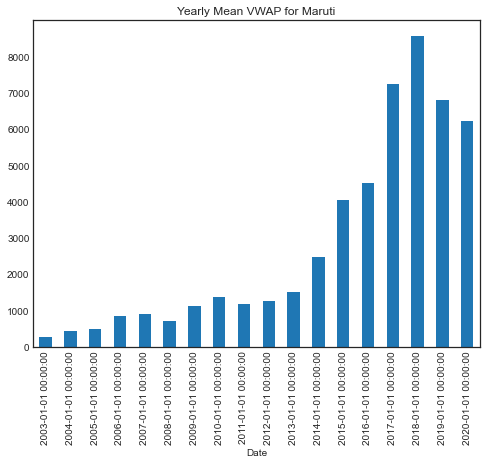

In [316]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')

In [317]:
df_vwap #to calc percent changee.. and tshift with index

VWAP
Date               
2003-07-09   165.95
2003-07-10   166.74
2003-07-11   172.45
2003-07-14   177.91
2003-07-15   176.88
...             ...
2020-10-26  7056.34
2020-10-27  7139.86
2020-10-28  7240.73
2020-10-29  7092.42
2020-10-30  6979.63

[4305 rows x 1 columns]

## NB-6 & 7

Stationarity

In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time.

It does not mean that the series does not change over time, just that the way it changes does not itself change over time.

The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows,

but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

Check Stationarity i.e Dicky Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [318]:
df_vwap=df_vwap[['VWAP']]


In [319]:
from statsmodels.tsa.stattools import adfuller

In [320]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [90]:
dicky_fuller_test(df_vwap)

ADF Statistic: -0.575646
p-value: 0.876391
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


In [91]:
#notebook 4 also

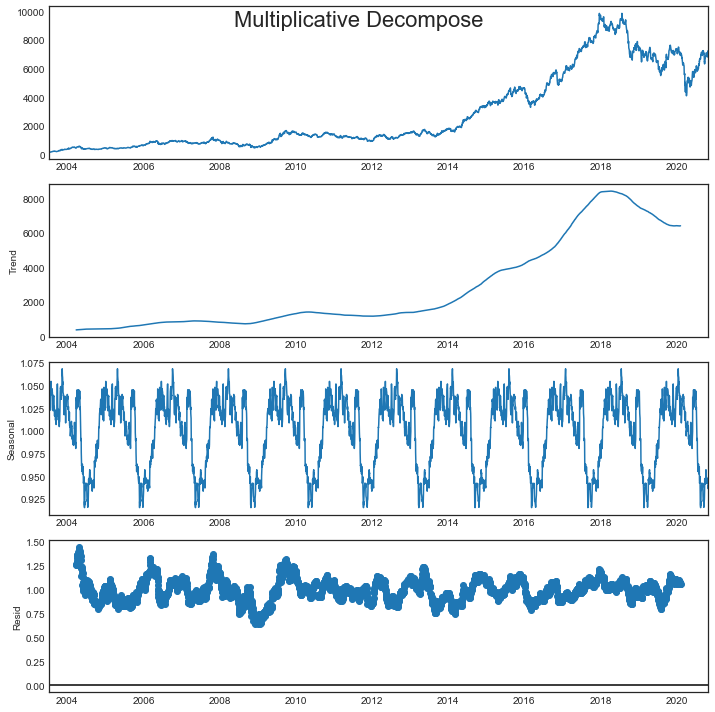

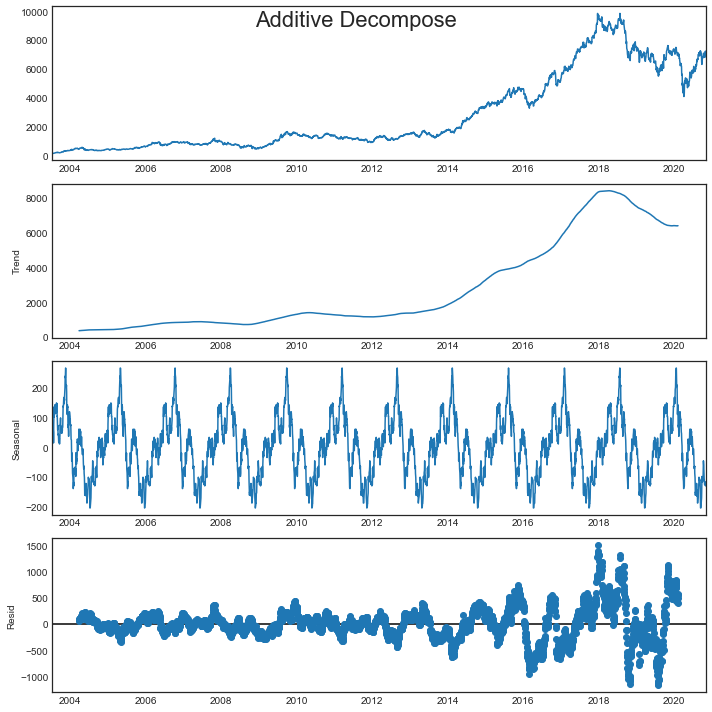

In [321]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df_vwap['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period=365)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [322]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.iloc[365:-365,:] #NOTEBOOK4

seas        trend       resid  actual_values
Date                                                          
2004-12-15   11.276262   435.850356    7.393382         454.52
2004-12-16   14.974541   435.908685    6.606775         457.49
2004-12-17   38.281866   435.951863  -21.533729         452.70
2004-12-20   42.534152   435.987562  -26.871714         451.65
2004-12-21   50.138528   435.981808  -26.510336         459.61
...                ...          ...         ...            ...
2019-05-08 -122.574027  7095.575151 -317.301123        6655.70
2019-05-09 -116.159778  7089.186603 -326.166824        6646.86
2019-05-10 -120.114809  7082.592356 -340.067547        6622.41
2019-05-13 -129.529763  7076.674795 -344.105031        6603.04
2019-05-14 -121.372229  7071.118247 -399.766017        6549.98

[3575 rows x 4 columns]

<AxesSubplot:ylabel='Density'>

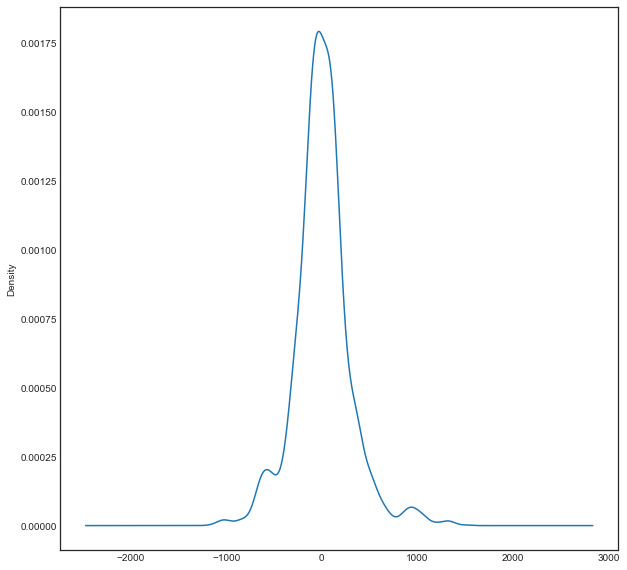

In [323]:
df_reconstructed.iloc[365:-365,]['resid'].plot(kind='kde') #RISK ANALYSIS

## Differencing done to remove non-stationarity (nb4 present-using shift)

In [324]:
df_vwap['diff_VWAP']=df_vwap['VWAP']-df_vwap['VWAP'].shift(1)

In [325]:
df_vwap

VWAP  diff_VWAP
Date                          
2003-07-09   165.95        NaN
2003-07-10   166.74       0.79
2003-07-11   172.45       5.71
2003-07-14   177.91       5.46
2003-07-15   176.88      -1.03
...             ...        ...
2020-10-26  7056.34      35.17
2020-10-27  7139.86      83.52
2020-10-28  7240.73     100.87
2020-10-29  7092.42    -148.31
2020-10-30  6979.63    -112.79

[4305 rows x 2 columns]

In [326]:
fig = go.Figure([go.Scatter(x=df.index,y=df_vwap.VWAP)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='VWAP over time ')
fig.show()

In [327]:
fig = go.Figure([go.Scatter(x=df.index,y=df_vwap.diff_VWAP)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='difference VWAP over time ')
fig.show()

In [328]:
df_vwap['diff_VWAP_2']=df_vwap['diff_VWAP'].shift(1)

In [329]:
fig = go.Figure([go.Scatter(x=df.index,y=df_vwap.diff_VWAP_2)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='difference VWAP over time ')
fig.show()

In [330]:
dicky_fuller_test(df_vwap.iloc[1:,:].diff_VWAP)


ADF Statistic: -12.182673
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the data is stationary.


## Plotting ACF and PACF



Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

Statistical correlation summarizes the strength of the relationship between two variables.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

In [331]:
df_vwap

VWAP  diff_VWAP  diff_VWAP_2
Date                                       
2003-07-09   165.95        NaN          NaN
2003-07-10   166.74       0.79          NaN
2003-07-11   172.45       5.71         0.79
2003-07-14   177.91       5.46         5.71
2003-07-15   176.88      -1.03         5.46
...             ...        ...          ...
2020-10-26  7056.34      35.17       213.16
2020-10-27  7139.86      83.52        35.17
2020-10-28  7240.73     100.87        83.52
2020-10-29  7092.42    -148.31       100.87
2020-10-30  6979.63    -112.79      -148.31

[4305 rows x 3 columns]

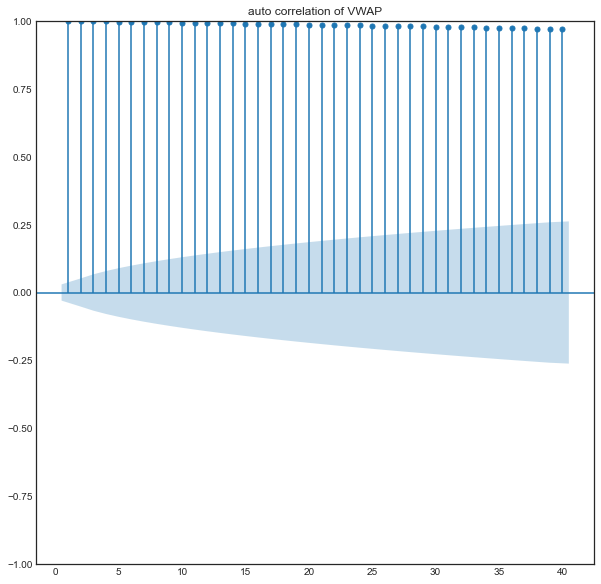

In [332]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_vwap['VWAP'], lags=40,title='auto correlation of VWAP',zero=False)
plt.show()

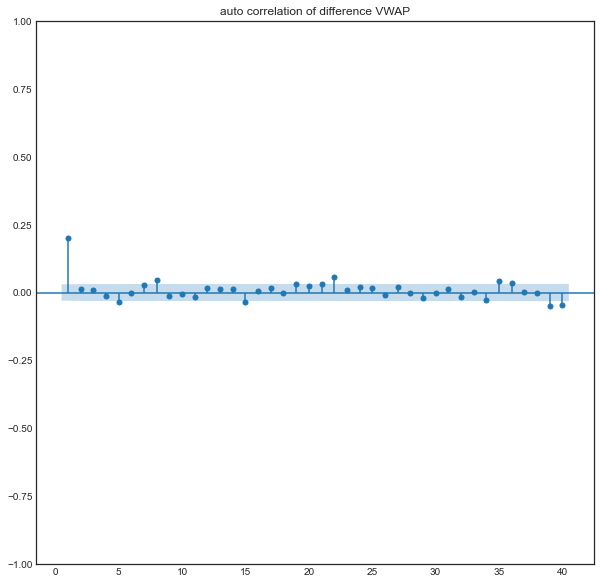

In [333]:
sm.graphics.tsa.plot_acf(df_vwap['diff_VWAP'].iloc[1:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

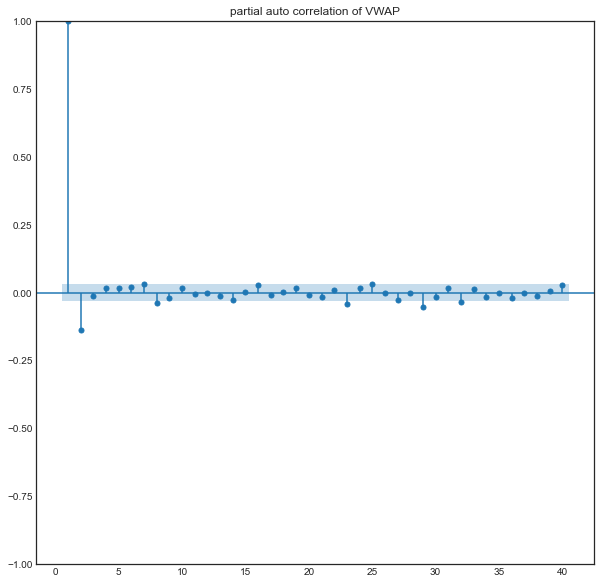

In [334]:
sm.graphics.tsa.plot_pacf(df_vwap['VWAP'], lags=40,title='partial auto correlation of VWAP',zero=False)
plt.show()

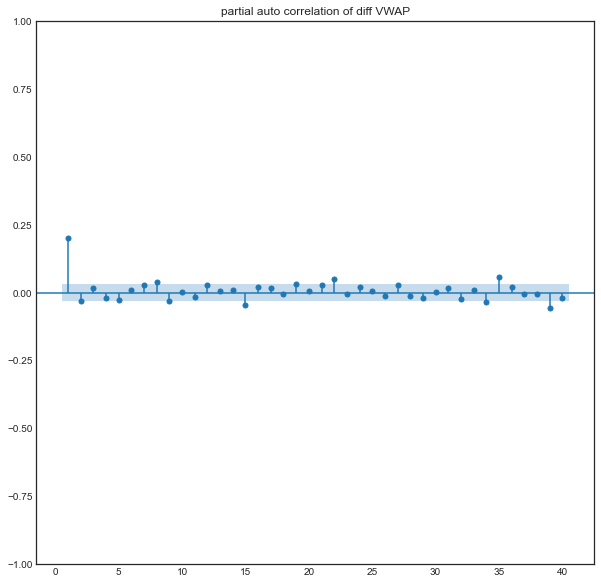

In [335]:
sm.graphics.tsa.plot_pacf(df_vwap['diff_VWAP'].iloc[1:], lags=40,title='partial auto correlation of diff VWAP',zero=False)
plt.show()

can use ARIMA

## NB 8

Moving average analysis
Moving average is a smoothing technique applied to time series to remove the fine-grained variation between time steps.

The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. 

Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations 
in the original time series.A moving average requires that you specify a window size called the window width. 

This defines the number of raw observations used to calculate the moving average value.

The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

In [107]:
#moving avg applied not working

In [108]:
#THESE STEPS ARE SAME IN 3,6,7 and then date conversion and giving it to AUTO ARIMA

In [336]:
df_vwap

VWAP  diff_VWAP  diff_VWAP_2
Date                                       
2003-07-09   165.95        NaN          NaN
2003-07-10   166.74       0.79          NaN
2003-07-11   172.45       5.71         0.79
2003-07-14   177.91       5.46         5.71
2003-07-15   176.88      -1.03         5.46
...             ...        ...          ...
2020-10-26  7056.34      35.17       213.16
2020-10-27  7139.86      83.52        35.17
2020-10-28  7240.73     100.87        83.52
2020-10-29  7092.42    -148.31       100.87
2020-10-30  6979.63    -112.79      -148.31

[4305 rows x 3 columns]

In [337]:
#Making a copy
df_vwap_1=df_vwap[['VWAP']].copy(deep=True)
#Reset index
df_vwap_1.reset_index(drop=True, inplace=True)

# Taking the number of days in window
window1 = 3
window2 = 7
window3 = 30

#Rolling mean
df_rolled_3d = df_vwap_1['VWAP'].rolling(window=window1, min_periods=0)
df_rolled_7d = df_vwap_1['VWAP'].rolling(window=window2, min_periods=0)
df_rolled_30d =df_vwap_1['VWAP'].rolling(window=window3, min_periods=0)

#Moving average
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

#Standard deviation
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

In [338]:
df_vwap_1[f"{'VWAP'}_mean_lag{window1}"] = df_mean_3d['VWAP']
df_vwap_1[f"{'VWAP'}_mean_lag{window2}"] = df_mean_7d['VWAP']
df_vwap_1[f"{'VWAP'}_mean_lag{window3}"] = df_mean_30d['VWAP']
    
df_vwap_1[f"{'VWAP'}_std_lag{window1}"] = df_std_3d['VWAP']
df_vwap_1[f"{'VWAP'}_std_lag{window2}"] = df_std_7d['VWAP']
df_vwap_1[f"{'VWAP'}_std_lag{window3}"] = df_std_30d['VWAP']

In [339]:
df_vwap_1

VWAP  VWAP_mean_lag3  VWAP_mean_lag7  VWAP_mean_lag30  VWAP_std_lag3  \
0      165.95             NaN             NaN              NaN            NaN   
1      166.74      165.949997      165.949997       165.949997            NaN   
2      172.45      166.345001      166.345001       166.345001       0.558614   
3      177.91      168.380005      168.380005       168.380005       3.546787   
4      176.88      172.366669      170.762497       170.762497       5.585466   
...       ...             ...             ...              ...            ...   
4300  7056.34     6901.786621     6906.822754      6880.373047     108.862633   
4301  7139.86     6961.839844     6918.975586      6873.962891     134.376282   
4302  7240.73     7072.456543     6950.350098      6873.557617      60.964245   
4303  7092.42     7145.643555     7002.804199      6879.192871      92.330948   
4304  6979.63     7157.669922     7033.529785      6879.187500      75.742073   

      VWAP_std_lag7  VWAP_std_lag30  
0               NaN             NaN  
1               NaN             NaN  
2          0.558614        0.558614  
3          3.546787        3.546787  
4          5.575993        5.575993  
...             ...             ...  
4300      70.814323      228.377777  
4301      88.746933      220.238663  
4302     121.897469      219.719864  
4303     157.223877      227.022858  
4304     149.441910      227.017670  

[4305 rows x 7 columns]

In [340]:
df_vwap.reset_index(inplace=True)

In [341]:
df_vwap_1['Date']=df_vwap['Date']

In [342]:
df_vwap_1.set_index('Date',inplace=True)

In [343]:
df_vwap_1

VWAP  VWAP_mean_lag3  VWAP_mean_lag7  VWAP_mean_lag30  \
Date                                                                   
2003-07-09   165.95             NaN             NaN              NaN   
2003-07-10   166.74      165.949997      165.949997       165.949997   
2003-07-11   172.45      166.345001      166.345001       166.345001   
2003-07-14   177.91      168.380005      168.380005       168.380005   
2003-07-15   176.88      172.366669      170.762497       170.762497   
...             ...             ...             ...              ...   
2020-10-26  7056.34     6901.786621     6906.822754      6880.373047   
2020-10-27  7139.86     6961.839844     6918.975586      6873.962891   
2020-10-28  7240.73     7072.456543     6950.350098      6873.557617   
2020-10-29  7092.42     7145.643555     7002.804199      6879.192871   
2020-10-30  6979.63     7157.669922     7033.529785      6879.187500   

            VWAP_std_lag3  VWAP_std_lag7  VWAP_std_lag30  
Date                                                      
2003-07-09            NaN            NaN             NaN  
2003-07-10            NaN            NaN             NaN  
2003-07-11       0.558614       0.558614        0.558614  
2003-07-14       3.546787       3.546787        3.546787  
2003-07-15       5.585466       5.575993        5.575993  
...                   ...            ...             ...  
2020-10-26     108.862633      70.814323      228.377777  
2020-10-27     134.376282      88.746933      220.238663  
2020-10-28      60.964245     121.897469      219.719864  
2020-10-29      92.330948     157.223877      227.022858  
2020-10-30      75.742073     149.441910      227.017670  

[4305 rows x 7 columns]

In [344]:
df_vwap.set_index('Date',inplace=True)

In [345]:
df_vwap_1.reset_index(inplace=True)

In [346]:
df_vwap_1.Date = pd.to_datetime(df_vwap_1.Date, format="%Y-%m-%d")
df_vwap_1["month"] = df_vwap_1.Date.dt.month
df_vwap_1["week"] = df_vwap_1.Date.dt.week
df_vwap_1["day"] = df_vwap_1.Date.dt.day
df["day_of_week"] = df_vwap_1.Date.dt.dayofweek

In [347]:
df_vwap_1

Date     VWAP  VWAP_mean_lag3  VWAP_mean_lag7  VWAP_mean_lag30  \
0    2003-07-09   165.95             NaN             NaN              NaN   
1    2003-07-10   166.74      165.949997      165.949997       165.949997   
2    2003-07-11   172.45      166.345001      166.345001       166.345001   
3    2003-07-14   177.91      168.380005      168.380005       168.380005   
4    2003-07-15   176.88      172.366669      170.762497       170.762497   
...         ...      ...             ...             ...              ...   
4300 2020-10-26  7056.34     6901.786621     6906.822754      6880.373047   
4301 2020-10-27  7139.86     6961.839844     6918.975586      6873.962891   
4302 2020-10-28  7240.73     7072.456543     6950.350098      6873.557617   
4303 2020-10-29  7092.42     7145.643555     7002.804199      6879.192871   
4304 2020-10-30  6979.63     7157.669922     7033.529785      6879.187500   

      VWAP_std_lag3  VWAP_std_lag7  VWAP_std_lag30  month  week  day  
0               NaN            NaN             NaN      7    28    9  
1               NaN            NaN             NaN      7    28   10  
2          0.558614       0.558614        0.558614      7    28   11  
3          3.546787       3.546787        3.546787      7    29   14  
4          5.585466       5.575993        5.575993      7    29   15  
...             ...            ...             ...    ...   ...  ...  
4300     108.862633      70.814323      228.377777     10    44   26  
4301     134.376282      88.746933      220.238663     10    44   27  
4302      60.964245     121.897469      219.719864     10    44   28  
4303      92.330948     157.223877      227.022858     10    44   29  
4304      75.742073     149.441910      227.017670     10    44   30  

[4305 rows x 11 columns]

In [348]:
df_vwap_1.set_index('Date',inplace=True)

In [349]:
df_vwap_1.reset_index(inplace=True)

In [350]:
0.8*len(df_vwap_1)

3444.0

In [351]:
df_train=df_vwap_1.iloc[:3444,:]
df_test=df_vwap_1.iloc[3444:,:]

In [352]:
exogenous_features =list(df_vwap_1.columns[2:])

In [353]:
#in 8 , a portion upto stationarity after this can be used for analysis and rest full theory good for studies

## LOG TRANSFORMATION IN NB 10

In [131]:
'''df_vwap
df_vwap['log_vwap']=np.log(df_vwap['VWAP'])
df_vwap

fig = go.Figure([go.Scatter(x=df_vwap.index,y=df_vwap.log_vwap)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='log VWAP over time ')
fig.show()

df_vwap['diff_VWAP']=df_vwap['log_vwap'].shift(1)
df_vwap'''

"df_vwap\ndf_vwap['log_vwap']=np.log(df_vwap['VWAP'])\ndf_vwap\n\nfig = go.Figure([go.Scatter(x=df_vwap.index,y=df_vwap.log_vwap)])\nfig.update_layout(\n    autosize=False,\n    width=1000,\n    height=500,\n    template='simple_white',\n    title='log VWAP over time ')\nfig.show()\n\ndf_vwap['diff_VWAP']=df_vwap['log_vwap'].shift(1)\ndf_vwap"

In [132]:
#log transf,df,kpss,differencing,seasonal,acf and pacf(diff visualisation)

## SECTION-3

### ARIMA -11

In [227]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error



In [228]:
df_vwap

VWAP  diff_VWAP  diff_VWAP_2
Date                                       
2003-07-09   165.95        NaN          NaN
2003-07-10   166.74       0.79          NaN
2003-07-11   172.45       5.71         0.79
2003-07-14   177.91       5.46         5.71
2003-07-15   176.88      -1.03         5.46
...             ...        ...          ...
2020-10-26  7056.34      35.17       213.16
2020-10-27  7139.86      83.52        35.17
2020-10-28  7240.73     100.87        83.52
2020-10-29  7092.42    -148.31       100.87
2020-10-30  6979.63    -112.79      -148.31

[4305 rows x 3 columns]

In [229]:
train=df_vwap.iloc[2:3044,:]['diff_VWAP_2']
test=df_vwap.iloc[3044:,:]['diff_VWAP_2']

In [230]:
model = ARIMA(train, order=(0,1,4))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:            diff_VWAP_2   No. Observations:                 3042
Model:                 ARIMA(0, 1, 4)   Log Likelihood              -13854.635
Date:                Fri, 19 Aug 2022   AIC                          27719.270
Time:                        12:36:56   BIC                          27749.370
Sample:                             0   HQIC                         27730.090
                               - 3042                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7829      0.011    -69.440      0.000      -0.805      -0.761
ma.L2         -0.2010      0.018    -11.241      0.000      -0.236      -0.166
ma.L3         -0.0603      0.016     -3.663      0.0

In [190]:
model = ARIMA(train, order=(0,1,1))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:            diff_VWAP_2   No. Observations:                 3042
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -13926.345
Date:                Fri, 19 Aug 2022   AIC                          27856.690
Time:                        12:20:51   BIC                          27868.730
Sample:                             0   HQIC                         27861.017
                               - 3042                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9955      0.001   -766.583      0.000      -0.998      -0.993
sigma2       555.4197      6.448     86.145      0.000     542.783     568.057
Ljung-Box (L1) (Q):                 128.53   Jarque-

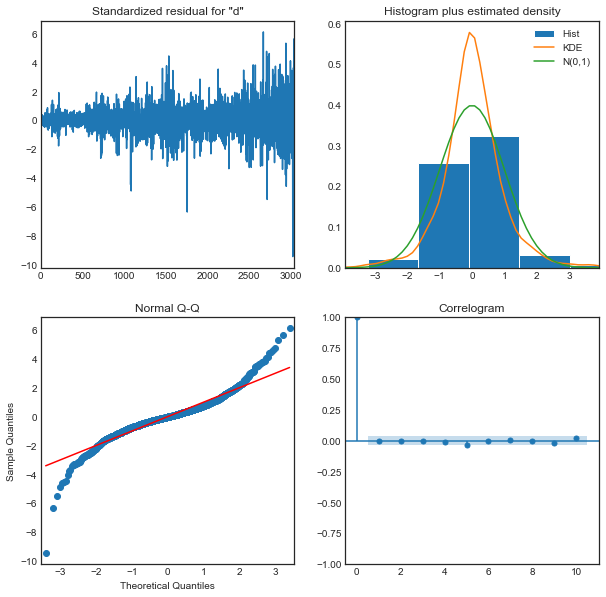

In [231]:
pred = fitted.plot_diagnostics()

In [232]:
fc = fitted.forecast(1261, alpha=0.05)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [233]:
# Make as pandas series
fc_series = pd.Series(fc, index=fc.index)

In [234]:
fc_series=fc_series.reset_index()

In [235]:
fc_series

index  predicted_mean
0      3042        6.735493
1      3043        4.925162
2      3044        4.238544
3      3045        5.282606
4      3046        5.282606
...     ...             ...
1256   4298        5.282606
1257   4299        5.282606
1258   4300        5.282606
1259   4301        5.282606
1260   4302        5.282606

[1261 rows x 2 columns]

In [236]:
fc_series['date']=test.index.tolist()

In [237]:
fc_series=fc_series.set_index('date')

In [238]:
fc_series.drop('index',axis=1,inplace=True)

In [239]:
test

Date
2015-09-24    -13.02
2015-09-28     88.48
2015-09-29     -8.45
2015-09-30     30.58
2015-10-01    122.24
               ...  
2020-10-26    213.16
2020-10-27     35.17
2020-10-28     83.52
2020-10-29    100.87
2020-10-30   -148.31
Name: diff_VWAP_2, Length: 1261, dtype: float64

In [240]:
fc_series=fc_series.squeeze()

In [241]:
fc_series

date
2015-09-24    6.735493
2015-09-28    4.925162
2015-09-29    4.238544
2015-09-30    5.282606
2015-10-01    5.282606
                ...   
2020-10-26    5.282606
2020-10-27    5.282606
2020-10-28    5.282606
2020-10-29    5.282606
2020-10-30    5.282606
Name: predicted_mean, Length: 1261, dtype: float64

In [242]:
test

Date
2015-09-24    -13.02
2015-09-28     88.48
2015-09-29     -8.45
2015-09-30     30.58
2015-10-01    122.24
               ...  
2020-10-26    213.16
2020-10-27     35.17
2020-10-28     83.52
2020-10-29    100.87
2020-10-30   -148.31
Name: diff_VWAP_2, Length: 1261, dtype: float64

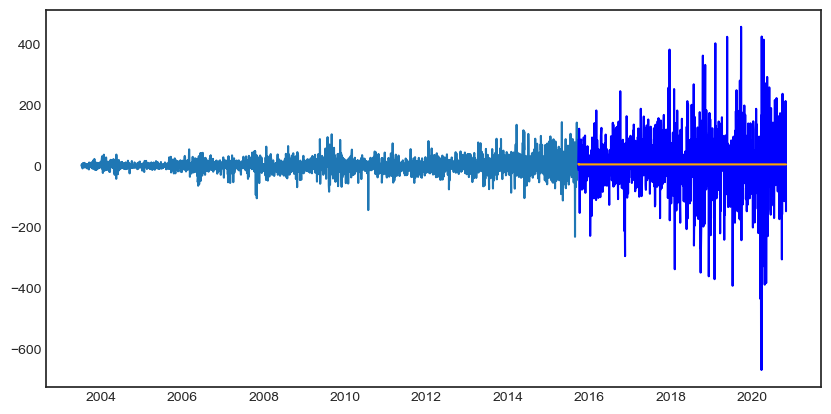

In [243]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

In [142]:
df_vwap

VWAP  diff_VWAP  diff_VWAP_2
Date                                       
2003-07-09   165.95        NaN          NaN
2003-07-10   166.74       0.79          NaN
2003-07-11   172.45       5.71         0.79
2003-07-14   177.91       5.46         5.71
2003-07-15   176.88      -1.03         5.46
...             ...        ...          ...
2020-10-26  7056.34      35.17       213.16
2020-10-27  7139.86      83.52        35.17
2020-10-28  7240.73     100.87        83.52
2020-10-29  7092.42    -148.31       100.87
2020-10-30  6979.63    -112.79      -148.31

[4305 rows x 3 columns]

In [143]:
# Create a new dataframe with only the 'Close column 
data = df_vwap.filter(['VWAP'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4090

In [144]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.18861438e-05],
       [1.73448002e-04],
       [7.62964722e-04],
       ...,
       [7.30512394e-01],
       [7.15200446e-01],
       [7.03555684e-01]])

In [145]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([9.18861438e-05, 1.73448002e-04, 7.62964722e-04, 1.32667073e-03,
       1.22033058e-03, 1.29363301e-03, 1.07579058e-03, 2.68431431e-04,
       1.66221002e-04, 0.00000000e+00, 9.78742296e-04, 9.69450438e-04,
       8.87888580e-04, 1.33699501e-03, 1.63846416e-03, 1.80571759e-03,
       1.73551245e-03, 1.99258716e-03, 3.05495617e-03, 3.41630618e-03,
       2.93106474e-03, 3.01572389e-03, 3.33577675e-03, 3.78385075e-03,
       4.40950247e-03, 5.24576962e-03, 5.70933006e-03, 5.46464448e-03,
       5.30152077e-03, 5.97776149e-03, 6.39176535e-03, 6.64677521e-03,
       5.92717249e-03, 6.57450521e-03, 7.24764864e-03, 6.61889964e-03,
       7.27449179e-03, 7.19809207e-03, 6.37111678e-03, 6.32568992e-03,
       5.84457820e-03, 6.28749006e-03, 6.76447207e-03, 6.49294335e-03,
       6.48881364e-03, 6.46300292e-03, 5.91065363e-03, 4.74813905e-03,
       3.92322861e-03, 5.10639177e-03, 4.54681547e-03, 4.08428747e-03,
       4.60876119e-03, 4.73471748e-03, 5.40269877e-03, 5.28293705e-03,
     

In [146]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4030/4030 [==============================] - 97s 23ms/step - loss: 0.0010


In [147]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 30ms/step


In [148]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

245.8455418535411

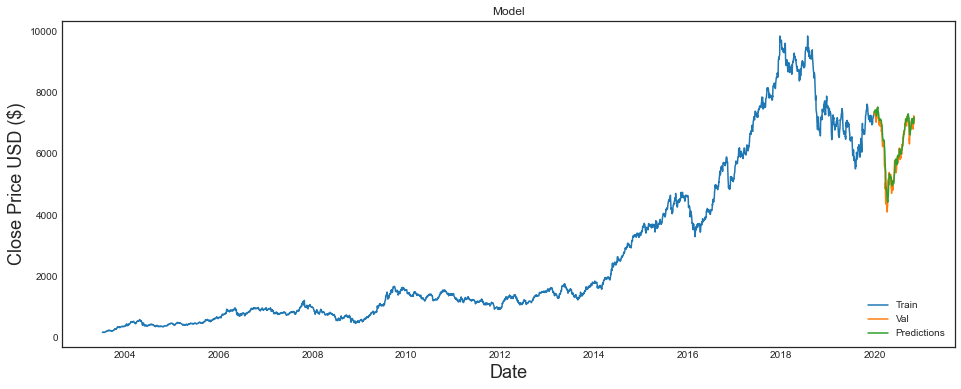

In [150]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['VWAP'])
plt.plot(valid[['VWAP', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [151]:
valid

VWAP  Predictions
Date                            
2019-12-24  7373.16  7346.722168
2019-12-26  7282.31  7382.649414
2019-12-27  7302.96  7394.299805
2019-12-30  7387.18  7398.664551
2019-12-31  7377.02  7415.915527
...             ...          ...
2020-10-26  7056.34  6998.765625
2020-10-27  7139.86  7038.081055
2020-10-28  7240.73  7094.487305
2020-10-29  7092.42  7165.829590
2020-10-30  6979.63  7198.226562

[215 rows x 2 columns]

In [154]:
df_vwap_1=df_vwap_1.iloc[:,:-3]

In [156]:
df_vwap_1

Date     VWAP  VWAP_mean_lag3  VWAP_mean_lag7  VWAP_mean_lag30  \
0    2003-07-09   165.95             NaN             NaN              NaN   
1    2003-07-10   166.74      165.949997      165.949997       165.949997   
2    2003-07-11   172.45      166.345001      166.345001       166.345001   
3    2003-07-14   177.91      168.380005      168.380005       168.380005   
4    2003-07-15   176.88      172.366669      170.762497       170.762497   
...         ...      ...             ...             ...              ...   
4300 2020-10-26  7056.34     6901.786621     6906.822754      6880.373047   
4301 2020-10-27  7139.86     6961.839844     6918.975586      6873.962891   
4302 2020-10-28  7240.73     7072.456543     6950.350098      6873.557617   
4303 2020-10-29  7092.42     7145.643555     7002.804199      6879.192871   
4304 2020-10-30  6979.63     7157.669922     7033.529785      6879.187500   

      VWAP_std_lag3  VWAP_std_lag7  VWAP_std_lag30  
0               NaN            NaN             NaN  
1               NaN            NaN             NaN  
2          0.558614       0.558614        0.558614  
3          3.546787       3.546787        3.546787  
4          5.585466       5.575993        5.575993  
...             ...            ...             ...  
4300     108.862633      70.814323      228.377777  
4301     134.376282      88.746933      220.238663  
4302      60.964245     121.897469      219.719864  
4303      92.330948     157.223877      227.022858  
4304      75.742073     149.441910      227.017670  

[4305 rows x 8 columns]

In [161]:
df_train=df_vwap_1.iloc[2:3444,:]
df_test=df_vwap_1.iloc[3444:,:]

In [162]:
exogenous_features =list(df_vwap_1.columns[2:])

In [163]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [167]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=33278.365, Time=9.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=35392.327, Time=0.99 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=33367.254, Time=3.66 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=33825.962, Time=2.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=35390.410, Time=5.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=33267.136, Time=8.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=33270.645, Time=7.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=33285.694, Time=7.59 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=33265.340, Time=10.30 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=33258.637, Time=8.52 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=33254.627, Time=9.84 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=33262.522, Time=9.91 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=33259.625, Time=10.42 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33260.360, Time=11.62 sec
 ARIMA(0,0,4)(0,

ARIMA(order=(0, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [168]:
forecast = model.predict(n_periods=len(df_test), exogenous=df_test[exogenous_features])
df_test["Forecast_ARIMAX"] = forecast

<AxesSubplot:>

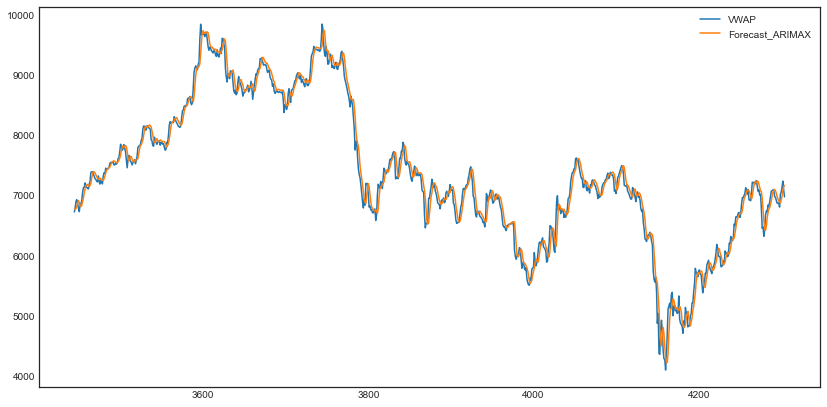

In [169]:
df_test[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [170]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_test.VWAP, df_test.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_test.VWAP, df_test.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 156.7870096178397

MAE of Auto ARIMAX: 115.75824837382264
